In [29]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [30]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df, df.iloc[:, :12:13].values, test_size=0.1)

In [32]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
lr.score(X_test, Y_test)

1.0

In [34]:
scores = cross_val_score(lr, df,df.iloc[:, :12:13].values, cv=7, scoring='neg_mean_squared_error')

In [35]:
scores.mean()

-2.194229354492126e-28

In [36]:
scores.std()

2.0460448144310774e-28

In [37]:
scores = cross_val_score(lr, df, df.iloc[:, :12:13].values, cv=10, scoring='r2')

In [38]:
scores.mean()

1.0

In [39]:
scores.std()

0.0

In [40]:
print('y = ' + str(lr.intercept_) + ' ')

y = [-5.68434189e-14] 


In [41]:
for i, c in enumerate(lr.coef_):
          print(str(c) + ' * x' + str(i))

[ 1.00000000e+00  7.48465100e-15 -1.51190758e-15 -4.01121967e-17
  5.26047881e-17 -5.84689516e-15 -2.13857020e-15  4.19164595e-17
 -1.42147305e-15 -1.98763566e-15  6.29335592e-15  1.83020675e-15
  8.59814478e-15 -2.08436587e-15] * x0


the r-squared is:  0.08225984073174197
the coefficient (value of a) for age, weight, constant is:  [5.11997213e-01 2.25086861e-02 9.82452699e+01]


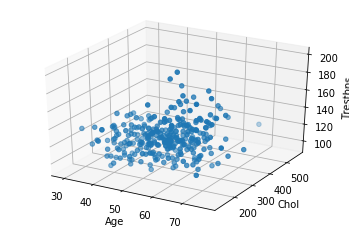

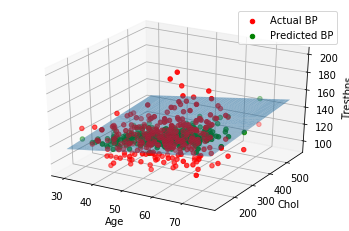

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create arrays for the data points
X = []
Y = []

#read the csv file
csvReader = open('heart2.csv')

#skips the header line
csvReader.readline()

for line in csvReader:
    y, x1, x2 = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term at the end
    Y.append(float(y))

# use numpy arrays so that we can use linear algebra later
X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('Age')
ax.set_ylabel('Chol')
ax.set_zlabel('Trestbps')

# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for age, weight, constant is: ", a)

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted BP')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Chol')
ax.set_zlabel('Trestbps')
ax.legend()
plt.show()